In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LassoCV
from sklearn import metrics

%matplotlib inline

pd.set_option('display.max_columns',100)
pd.set_option('display.max_rows',200)

In [2]:
df = pd.read_csv('../US_births.csv', low_memory=False)

In [3]:
df = df.sample(n=100_000)

In [4]:
df.shape

(1000000, 55)

In [5]:
df.drop(df[df['DBWT'].eq(9999)].index, inplace=True)

In [6]:
df.drop(df[df['BMI'].eq(99.9)].index, inplace=True)
df.drop(df[df['DBWT'].eq(9999)].index, inplace=True)
df.drop(df[df['WTGAIN'].eq(99)].index, inplace=True)
df.drop(df[df['PWgt_R'].eq(999)].index, inplace=True)
df['binary_sex'] = np.where(df['SEX'] == 'M', 1, 0)

In [7]:
df.shape

(966464, 56)

In [8]:
conditions = [df['CIG_0'].eq(0),
              df['CIG_0'].eq(99),
              
    
]
choices = ['None',
           'Unknown',
]

df['smoked'] = np.select(conditions, choices, 'Daily')

In [9]:
conditions = [df['PRIORDEAD'].eq(0),
              df['PRIORDEAD'].eq(99),
              
    
]
choices = ['None',
           'Unknown',
]

df['PRIORDEAD_cat'] = np.select(conditions, choices, 'Yes')

In [10]:
conditions = [df['PRIORTERM'].eq(0),
              df['PRIORTERM'].eq(99),
              
    
]
choices = ['None',
           'Unknown',
]

df['PRIORTERM_cat'] = np.select(conditions, choices, 'Yes')

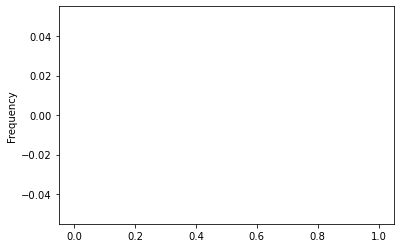

In [11]:
df[df['WTGAIN'].eq(99)]['BMI'].plot(kind='hist')

In [12]:
df.shape

(966464, 59)

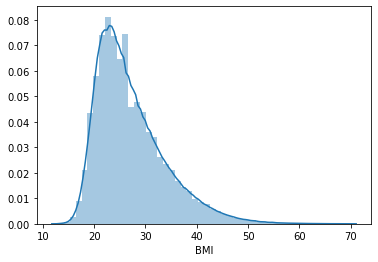

In [13]:
sns.distplot(df['BMI'])

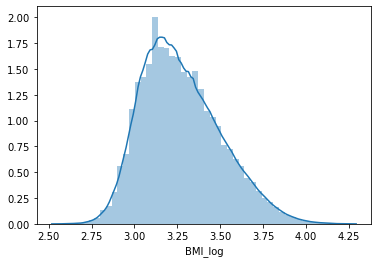

In [14]:
df['BMI_log'] = np.log(df['BMI'])
sns.distplot(df['BMI_log'])

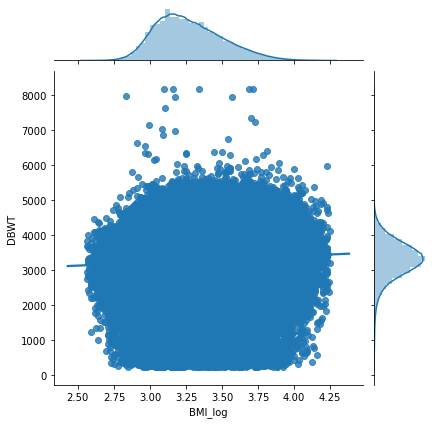

In [99]:
sns.jointplot(x='BMI_log', y= 'DBWT', data =df, kind='reg')

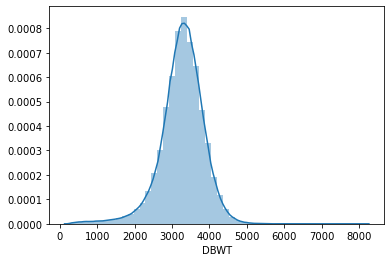

In [15]:
sns.distplot(df['DBWT'])

In [16]:
df['SEX'].unique()

array(['F', 'M'], dtype=object)

In [17]:
_M_df = df[df['SEX'].eq('M')]
_F_df = df[df['SEX'].eq('F')]

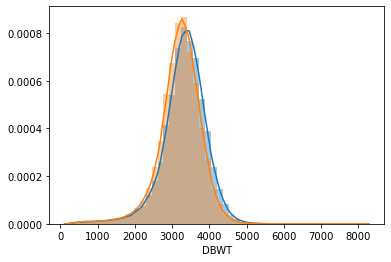

In [18]:
sns.distplot(_M_df['DBWT'])
sns.distplot(_F_df['DBWT'])

In [19]:
from statsmodels.formula.api import ols
formula = 'DBWT~binary_sex'
model = ols(formula=formula, data = df).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   DBWT   R-squared:                       0.009
Model:                            OLS   Adj. R-squared:                  0.009
Method:                 Least Squares   F-statistic:                     9195.
Date:                Wed, 29 Jul 2020   Prob (F-statistic):               0.00
Time:                        11:09:54   Log-Likelihood:            -7.5266e+06
No. Observations:              966464   AIC:                         1.505e+07
Df Residuals:                  966462   BIC:                         1.505e+07
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   3206.9813      0.849   3776.978      0.000    3205.317    3208.646
binary_sex   113.8338      1.187     95.889      0.000     111.507     116.161
==============================================================================
Omnibus:                   154020.382   Durbin-Watson:                   2.000
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           428209.476
Skew:                          -0.863   Prob(JB):                         0.00
Kurtosis:                       5.766   Cond. No.                         2.65
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [20]:
from scipy import stats
stats.f_oneway(_M_df['DBWT'], _F_df['DBWT'])

F_onewayResult(statistic=9194.764706448046, pvalue=0.0)

In [21]:
del _M_df
del _F_df

In [22]:
df['MRAVE6'].unique()

array([1, 4, 2, 3, 6, 5], dtype=int64)

In [23]:
_1_race = df[df['MRAVE6'].eq(1)]
_2_race = df[df['MRAVE6'].eq(2)]
_3_race = df[df['MRAVE6'].eq(3)]
_4_race = df[df['MRAVE6'].eq(4)]
_5_race = df[df['MRAVE6'].eq(5)]
_6_race = df[df['MRAVE6'].eq(6)]

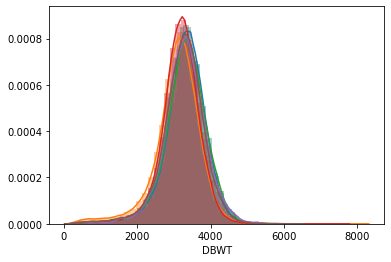

In [24]:
sns.distplot(_1_race['DBWT'])
sns.distplot(_2_race['DBWT'])
sns.distplot(_3_race['DBWT'])
sns.distplot(_4_race['DBWT'])
sns.distplot(_5_race['DBWT'])
sns.distplot(_6_race['DBWT'])

In [25]:
stats.f_oneway(_1_race['DBWT'], _2_race['DBWT'], _3_race['DBWT'], _4_race['DBWT'], _5_race['DBWT'], _6_race['DBWT'])

F_onewayResult(statistic=4402.862145606822, pvalue=0.0)

In [26]:
del _1_race
del _2_race
del _3_race
del _4_race
del _5_race
del _6_race

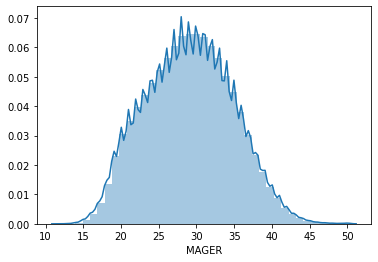

In [27]:
sns.distplot(df['MAGER'], bins = 39)

In [28]:
df.shape

(966464, 60)

In [29]:
df['NO_INFEC'].value_counts()

1    938126
0     26575
9      1763
Name: NO_INFEC, dtype: int64

In [30]:
df['MRAVE6'].value_counts()

1    713023
2    150768
4     64883
6     25599
3      9259
5      2932
Name: MRAVE6, dtype: int64

In [31]:
df['PRIORTERM'].value_counts()

0     700580
1     172198
2      58048
3      20222
4       7197
5       2982
99      2247
6       1344
7        645
8        359
9        237
10       176
11        80
12        67
13        27
14        17
17         9
16         8
15         7
18         3
21         3
19         3
28         1
22         1
24         1
25         1
26         1
Name: PRIORTERM, dtype: int64

In [32]:
df['FRACE6'].value_counts()


1    591913
9    171615
2    119511
4     54794
6     20067
3      6214
5      2350
Name: FRACE6, dtype: int64

In [33]:
df['SEX'].value_counts()

M    494411
F    472053
Name: SEX, dtype: int64

In [34]:
df['PAY'].value_counts()

2    478912
1    404697
3     40859
8     17924
5     11689
6      7039
9      4603
4       741
Name: PAY, dtype: int64

In [35]:
df['DMAR'].unique()

array([' ', '1', '2'], dtype=object)

In [36]:
df['LD_INDL'].unique()

array(['N', 'Y', 'U'], dtype=object)

In [37]:
df['RF_CESAR'].unique()

array(['N', 'Y', 'U'], dtype=object)

In [38]:
df['NO_RISKS'].unique()

array([1, 0, 9], dtype=int64)

In [39]:
df['NO_MMORB'].unique()

array([1, 0, 9], dtype=int64)

In [40]:
df['MAGE_IMPFLG'].unique()

array([' ', '1'], dtype=object)

In [41]:
df['BMI*SEX'] = np.where(df['SEX'].eq('M'), df['BMI'], 0)

In [42]:
df['SEX'].unique()

array(['F', 'M'], dtype=object)

In [43]:
df['BMI*AGE'] = df['BMI'] * df['MAGER']

In [44]:
df['over_35age'] = np.where(df['MAGER'].gt(35), 1, 0)

In [45]:
df['WTGAIN*AGE'] = df['WTGAIN'] * df['MAGER']

In [46]:
df['WTGAIN*BMI'] = df['WTGAIN'] * df['BMI']

In [71]:
df['AGE*WTGAIN'] = df['WTGAIN'] = df['MAGER']

In [72]:
X = df[['BMI','MAGER','smoked', 'PRIORDEAD_cat', 'WTGAIN','binary_sex','MRAVE6', 'PRIORTERM_cat','FRACE6', 'BMI*AGE', 'WTGAIN*AGE', 'WTGAIN*BMI',
        'AGE*WTGAIN',
        'FEDUC','DMAR','ATTEND', 'MTRAN', 'BMI*SEX', 'over_35age',
       'LD_INDL','RF_CESAR','RDMETH_REC','NO_RISKS']]
_X = pd.get_dummies(X, columns=['MRAVE6','smoked','FRACE6', 'PRIORDEAD_cat', 'PRIORTERM_cat',
                               'FEDUC','DMAR','ATTEND', 'MTRAN',
                               'LD_INDL','RF_CESAR','RDMETH_REC','NO_RISKS'])
y = df['DBWT']

In [85]:
_X.columns


Index(['BMI', 'MAGER', 'WTGAIN', 'binary_sex', 'BMI*AGE', 'WTGAIN*AGE',
       'WTGAIN*BMI', 'AGE*WTGAIN', 'BMI*SEX', 'over_35age', 'MRAVE6_1',
       'MRAVE6_2', 'MRAVE6_3', 'MRAVE6_4', 'MRAVE6_5', 'MRAVE6_6',
       'smoked_Daily', 'smoked_None', 'smoked_Unknown', 'FRACE6_1', 'FRACE6_2',
       'FRACE6_3', 'FRACE6_4', 'FRACE6_5', 'FRACE6_6', 'FRACE6_9',
       'PRIORDEAD_cat_None', 'PRIORDEAD_cat_Unknown', 'PRIORDEAD_cat_Yes',
       'PRIORTERM_cat_None', 'PRIORTERM_cat_Unknown', 'PRIORTERM_cat_Yes',
       'FEDUC_1', 'FEDUC_2', 'FEDUC_3', 'FEDUC_4', 'FEDUC_5', 'FEDUC_6',
       'FEDUC_7', 'FEDUC_8', 'FEDUC_9', 'DMAR_ ', 'DMAR_1', 'DMAR_2',
       'ATTEND_1', 'ATTEND_2', 'ATTEND_3', 'ATTEND_4', 'ATTEND_5', 'ATTEND_9',
       'MTRAN_N', 'MTRAN_U', 'MTRAN_Y', 'LD_INDL_N', 'LD_INDL_U', 'LD_INDL_Y',
       'RF_CESAR_N', 'RF_CESAR_U', 'RF_CESAR_Y', 'RDMETH_REC_1',
       'RDMETH_REC_2', 'RDMETH_REC_3', 'RDMETH_REC_4', 'RDMETH_REC_5',
       'RDMETH_REC_6', 'RDMETH_REC_9', 'NO_RISKS_0', 'N

In [86]:
_X['RACE_1*BMI'] = _X['MRAVE6_1'] * _X['BMI']
_X['RACE_2*BMI'] = _X['MRAVE6_2'] * _X['BMI']
_X['RACE_3*BMI'] = _X['MRAVE6_3'] * _X['BMI']
_X['RACE_4*BMI'] = _X['MRAVE6_4'] * _X['BMI']
_X['RACE_5*BMI'] = _X['MRAVE6_5'] * _X['BMI']
_X['RACE_6*BMI'] = _X['MRAVE6_6'] * _X['BMI']

In [87]:
_X.shape

(966464, 75)

In [88]:
X_train, X_test, y_train, y_test = train_test_split(_X, y, random_state = 42, test_size= 0.2)


In [89]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_train = pd.DataFrame(data=X_train, columns = _X.columns)
X_test = scaler.transform(X_test)
X_test= pd.DataFrame(data=X_test, columns = _X.columns)

In [90]:
# _X.corr()

In [91]:
lasso_cv = LassoCV(cv=5, random_state=42, verbose=1, tol=0.001)
lasso_cv.fit(X_train, y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
....................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:   15.4s finished


LassoCV(alphas=None, copy_X=True, cv=5, eps=0.001, fit_intercept=True,
        max_iter=1000, n_alphas=100, n_jobs=None, normalize=False,
        positive=False, precompute='auto', random_state=42, selection='cyclic',
        tol=0.001, verbose=1)

In [92]:
y_train_pred = lasso_cv.predict(X_train)
y_test_pred = lasso_cv.predict(X_test)

In [93]:
np.sqrt(metrics.mean_squared_error(y_train,y_train_pred))

545.972559846089

In [94]:
np.sqrt(metrics.mean_squared_error(y_test, y_test_pred))

547.4276025011519

In [95]:
y.describe()

count    966464.000000
mean       3265.214908
std         586.142638
min         227.000000
25%        2965.000000
50%        3305.000000
75%        3629.000000
max        8165.000000
Name: DBWT, dtype: float64

In [96]:
_coef_df = pd.DataFrame()
_coef_df['variables'] = _X.columns
_coef_df['coefficients'] = lasso_cv.coef_
_coef_df.sort_values(by='coefficients')

,variables,coefficients
0,BMI,96.069305
1,MAGER,-0.062866
2,WTGAIN,-0.000000
3,binary_sex,59.392052
4,BMI*AGE,-3.266793
5,WTGAIN*AGE,103.735538
6,WTGAIN*BMI,16.225505
7,AGE*WTGAIN,-14.056955
8,BMI*SEX,-3.829002
9,over_35age,-13.460437


In [97]:
X

,BMI,MAGER,smoked,PRIORDEAD_cat,WTGAIN,binary_sex,MRAVE6,PRIORTERM_cat,FRACE6,BMI*AGE,WTGAIN*AGE,WTGAIN*BMI,AGE*WTGAIN,FEDUC,DMAR,ATTEND,MTRAN,BMI*SEX,over_35age,LD_INDL,RF_CESAR,RDMETH_REC,NO_RISKS
367964,20.4,39,None,None,39,0,1,None,1,795.6,273,142.8,39,6,,1,N,0.0,1,N,N,1,1
816207,23.6,35,None,None,35,0,1,None,1,826.0,875,590.0,35,6,1,1,N,0.0,0,Y,N,1,0
3173343,25.1,25,None,None,25,1,1,None,1,627.5,225,225.9,25,4,1,2,N,25.1,0,N,N,1,1
285541,34.5,30,None,None,30,1,1,None,1,1035.0,1020,1173.0,30,3,,1,N,34.5,0,N,N,1,1
2828181,22.6,34,None,None,34,1,1,None,1,768.4,850,565.0,34,6,1,1,N,22.6,0,N,N,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1232020,20.1,30,None,None,30,0,1,None,1,603.0,960,643.2,30,2,1,1,N,0.0,0,N,N,1,1
3763594,30.0,32,None,None,32,1,1,Yes,1,960.0,1856,1740.0,32,4,2,1,N,30.0,0,N,Y,2,0
260205,25.1,35,None,None,35,1,1,Yes,1,878.5,525,376.5,35,4,,3,N,25.1,0,N,N,1,1
1234550,32.3,23,None,None,23,1,1,None,9,742.9,828,1162.8,23,9,2,1,N,32.3,0,N,N,3,1


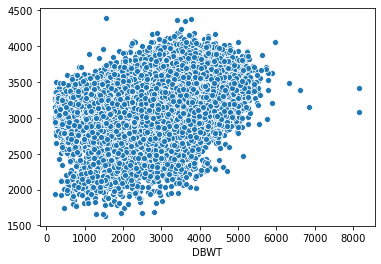

In [98]:
sns.scatterplot(y_test,y_test_pred)

In [49]:
df.shape

(966517, 64)

In [ ]:
df['FAGECOMB'].value_counts()

In [ ]:
df['MRAVE6'].value_counts()

In [ ]:
X

In [ ]:
df['NO_INFEC'].value_counts()

In [ ]:
df.shape

In [ ]:
df['CIG_0'].value_counts()